In [52]:
import pandas as pd

In [53]:
# Đọc dữ liệu
df = pd.read_csv('adult.data', sep = ', ',engine='python')

In [54]:
df.columns = ['age','workclass','fnlwg','education','education-num','marital-status','occupation','relationship','race','sex', 'capital-gain', 'capital-los', 'hours-per-week', 'native-country', 'income']
print(df)

       age         workclass   fnlwg   education  education-num  \
0       50  Self-emp-not-inc   83311   Bachelors             13   
1       38           Private  215646     HS-grad              9   
2       53           Private  234721        11th              7   
3       28           Private  338409   Bachelors             13   
4       37           Private  284582     Masters             14   
...    ...               ...     ...         ...            ...   
32555   27           Private  257302  Assoc-acdm             12   
32556   40           Private  154374     HS-grad              9   
32557   58           Private  151910     HS-grad              9   
32558   22           Private  201490     HS-grad              9   
32559   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0      Married-civ-spouse    Exec-managerial        Husband  White    Male   
1                Divorced  Handlers-cle

In [55]:
print(df.shape)

(32560, 15)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwg           32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-los     32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [57]:
df.describe()

,age,fnlwg,education-num,capital-gain,capital-los,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [58]:
df.isna().sum()

age               0
workclass         0
fnlwg             0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-los       0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [59]:
df.duplicated().sum()

24

In [60]:
df = df.drop_duplicates(keep='last')


In [61]:
df.duplicated().sum()

0

In [62]:
columns = df.columns
types = df.dtypes
print(columns)
print(types)

Index(['age', 'workclass', 'fnlwg', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-los', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
age                int64
workclass         object
fnlwg              int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-los        int64
hours-per-week     int64
native-country    object
income            object
dtype: object


<Axes: xlabel='income'>

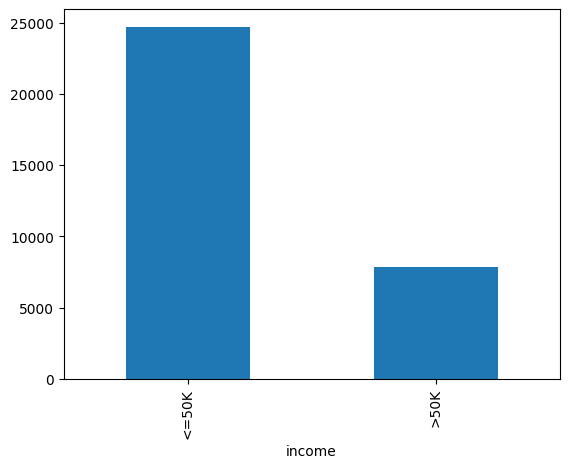

In [63]:
g = df[columns[-1]].value_counts()
g.plot.bar()

In [64]:
print('individuals making more than $50,000:', df[df['income'] == '>50K'].shape[0])
print('individuals making at most $50,000: ', df[df['income'] =='<=50K'].shape[0])


individuals making more than $50,000: 7839
individuals making at most $50,000:  24697


In [65]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object': 
    le.fit_transform(df[columns[i]])
    df[columns[i]] = le.transform(df[columns[i]])
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11744\2823964782.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11744\2823964782.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11744\2823964782.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\ASUS\AppData\Local\Tem

,age,workclass,fnlwg,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [66]:
data = df.values
print(data[:2])

[[    50      6  83311      9     13      2      4      0      4      1
       0      0     13     39      0]
 [    38      4 215646     11      9      0      6      1      4      1
       0      0     40     39      0]]


In [67]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(32536, 14)
(32536,)


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.45205479 0.75       0.0482376  0.6        0.8        0.33333333
 0.28571429 0.         1.         1.         0.         0.
 0.12244898 0.95121951]
